<a href="https://colab.research.google.com/github/kankeinai/Computational_physics/blob/main/Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PHY270 Assignment 3: Numerical root finding
Student name: Milana Begantsova




---

##Abstract
In this experiment, I introduce differents methods used to estimate the roots of the equation, particularly I discuss False-position, Newton-Raphson, and Secant methods. While discussion, I compare their convergence rates, precisio and overall perfomance for one particular equation. The outcomes of this experiment are the plots of relative error versus number of iterations for each method. According to the results of the experiment, the most suitable method for our equation is Newton-Raphson method. Its convergence rate is the lowest one and precision is the highiest one. Secant method has shown relatively the same precision, but converged lower. The worst result was shown by False-position method.



---


##Introduction
Our world behaves according to particular laws and equations. And it is not always possible to determine unknown parameters numerically with traditional methods. For example, we can use discriminant to calculate roots for simple quadratic equations or Vietta theorem for polinimial equations of other powers. We can calculate roots of more complex functions using computational power.

There are different compuational methods to estimate the roots of functions, but they are usually devided into two groups: bracketing and open methods. When we use bracketing methods, we, at first, determine the interval at which we have solution. Then we try to narrow this interval until we reach convergence. The example of bracketing method is False-position (the formula and principle will be discussed later). Usually bracketing methods are more relible and stable, as if there is a root at the defined interval, it will converge to it. But of course narrowing the interval may took much time, so usually such methods are slow. 

The second group of methods is open. In this method we does not work with the interval, we start from the initial guess. In this experiment we will discuss two open methods: Newton-Raphson and Secant. Open methods are usually very fast compare with bracketing ones, but they sometimes fail to converge. Their convergence depends on the initial guess and function that we try to estimate.

In this experiment, I am going to estimate roots for the equation: $$\\v=\frac{gm}{c}(1-e^{−(c/m)t})$$
where $m$ is unknown parameter. I should note that all methods of determining roots work if:
1. We have one root
2. Root is real
3. 

I will employ the three methods: False-position, Newton-Raphson and Secant methods; and I will estimate $m$ to the level of $\varepsilon_s = 10^{-12}$, where $\varepsilon_s$ is:
$$\varepsilon_s=\left|\frac{x_{i+1}-x_{i}}{x_{i+1}}\right|$$

For all of the methods I will provide the graphs of relative error of solution versus iterations and discuss what method is the best for our equation in terms of speed (of convergence), preciseness. 


---
##Methods
We have an equation of velocity of parachoutist and should try to estimate his mass if we now all other parameters. Before applying any computational methods, I will use graphical method to analyse how function behaves and what is a possible range of values of mass. I will plot a function of mass with `matplotlib`. With graphical method, I will be able to determine what are the possible initial gueses for other three methods. The accuracy of results will assessed with relative error formula:
$$\varepsilon=\left|\frac{true-measured}{true}\right|$$
Graphical method's advantage is that it does not require us to calculate anything. It is easy to plot. But the result will be very approximated since we determine it visually.
Once I determine the range of possible values, I will computational methods to estimate the roots.


###False-position method
The False-position method requires two innitial guesses between which the root is situated. In this experiment those to guesses will be defined as $m_l$ (left-most border) and $m_u$ (right-most border). The method works according to this alghoritm:
1. We "draw a line" through $f(m_l)$ and $f(m_u)$ (derivative) and see at which point this line crosses x-axis. This is called $m_r$ (root). Numerically root will be calculated by formula:
$$m_r = m_u - \frac{f(m_u)(m_l-m_u)}{f(m_l)-f(m_u)}$$
2. Then we calculate $\varepsilon_s$ and in case it is less than $\varepsilon_s=10^{−12}$, we stop. The root is found. 
> Note: To calculate $\varepsilon_s$ we need previous value of the root.
$$\varepsilon_s=\left| \frac{m_r-m_{r-old}}{m_r} \right|$$
3. If the root is not found, we should shrink the interval, so either $m_l$ or $m_u$ now will be equal to $m_r$. To determine what border should be moved to $m_r$, we conduct a test: multiply value of $f(m_l)$ to $f(m_r)$. If the value is positive, then $f(m_l)=f(m_r)$. Or, if it is negative,  then $f(m_u)=f(m_r)$. If it is 0, then root is found.
4. Repeat these steps until convergence or the root is found.
<center><img src="https://4.bp.blogspot.com/-oWFvW8wIJlE/WRvkBhPxGQI/AAAAAAAAAIM/G8hpSmjbKp4eKRuieJFA31ZzsSFElnT5QCLcB/s400/Bisection%2BMethod.png" height=300>
<p>Figure 1 – False-position method</p></center>

The False-position method is very reliable and stable. If there is root in the defined interval, then it will converge to this root. But due to working with changing borders, it may converge too slow.

###Newton-Raphson method
The Newton-Raphson method is an open one which means that we do not work with changing borders. But we still should have an innitial guess. It has next alghoritm:
1. Derive analytical formula for derivative of a function 
2. Choose initial guess $m_0$ and calculate derivative, function value. Substutute them to formula:
$$m_1 = m_0 - \frac{f(m_0)}{f'(m_0)}$$
Graphically it is similar to False-position method (see Figure 2). We draw through $f(m_0)$ a line with $slope = f'(m_0)$. This line crosses x-axis at point $m_1$.
3. Then we calculate $\varepsilon_s$ as in False-position:
> $$\varepsilon_s=\left| \frac{m_1-m_0}{m_1} \right|$$
4. Update $m_0$, set $m_0=m_1$
5. If $\varepsilon_s<10^{-12}$, then return value of $m_0$.
6. Repeat until convergence.


<center><img src="https://www.researchgate.net/profile/Daniel_Marcsa2/publication/266091369/figure/fig5/AS:476476194725892@1490612185738/The-geometrical-construction-of-Newton-Raphson-method.png" height = 300>
<p>Figure 2 – Newton-Raphson method</p>
</center>

The use of this method guarantees either fast convergence or divergence. Sometimes it could be difficult to derive analutical formula for derivative or its calculation could be costly. If our innitial guess is too far from the root it may diverge. It also may diverge if __________

###Secant method
It seems to me that this method is the combination of Newton-Raphson and False-position method. It is an open method, so it follows the same alghoritm as Newton-Raphson method, except the way derivative is calculated. In Secant method the derivative is calculated based on previous two iterations:
$$m_{i+1} = m_i - \frac{f(m_i) (m_{i-1} - m_{i})}{f(m_{i-1})-f(m_{i})}$$
$$\varepsilon_s=\left|\frac{x_{i+1}-x_{i}}{x_{i+1}}\right|$$
So, at first we should provide two initial gueses as in False-position method. The formula for $m_{i+1}$ is also pretty similar to False-position method, but there we do not work with borders or intervals. 
Compare with False-position method, it should converge faster. Compare with Newton-Raphson method, it will be much easier to calculate. It is still may diverge if the initial guesses are chosen wrongly.

###Additional comments
After each method I will provide a graphs of how relative error of velocity with estimated mass changes as methods converge. Then using those graphs, I will make a conclusion about preciison, convergence rate and speed of each method. 

To increase accuracy of the experiment, I will calculate everything in `numpy.float128()` datatype.

##Main part

To decrease round-off error, I have decided to compute approximated values in np.float128 datatype as it has highier precision. To plot my graphs I will use matplotlib. Pandas will be used to generate summative results of the experiment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Before starting the experiment, we should implement a function that will calculate us a value of equation:
$$\\v(m)=\frac{gm}{c}(1-e^{−(c/m)t})=35$$
We should try to estimate value of $m$ provided that
1. $g=9.8 \ m/s^2$ 
2. $c=15 \ kg/s$ 
3. $v=35 \ m/s$, 
4.$t=9 \ s$

In [2]:
g = 9.8
c = 15
v_0 = 35
t = 9

Methods that are used to estimate roots usually try to come up with such value of $x$, such that $f(x)=0$. As you can see the $v(m)\neq0$, so I will approximate $f(m) = v(m) - 35$.

Later on we will derive $f'(m)$ analytically, so it will be easier for us if we redifine constants of original equation (and will not  need to recalculate them all the time). Let $C_1 = \frac{g}{c}$, $C_2 = - ct$

In [3]:
C_1 = g/c
C_2 = -c*t

This is the final formula that we will approximate
$$v(m) = C_1m(1-e^{\frac{C_2}{m}})$$
$$f(m) = v(m)-35$$


In [4]:
def velocity(m):
  return C_1*m*(1-np.exp(C_2/m))


In [5]:
def function(m):
  return velocity(m)-35

###Graphical method

Before applying any computational method, we should clearly understand how our function behave and see what is approximate value of our root. In this experiment, we try to approximate the mass of parachoutist. My initial guess is that the mass will be somewhere between 30 and 100 kg. I will plot the graph of $f(m)$ versus $m$ to see where $f(m)=0$.

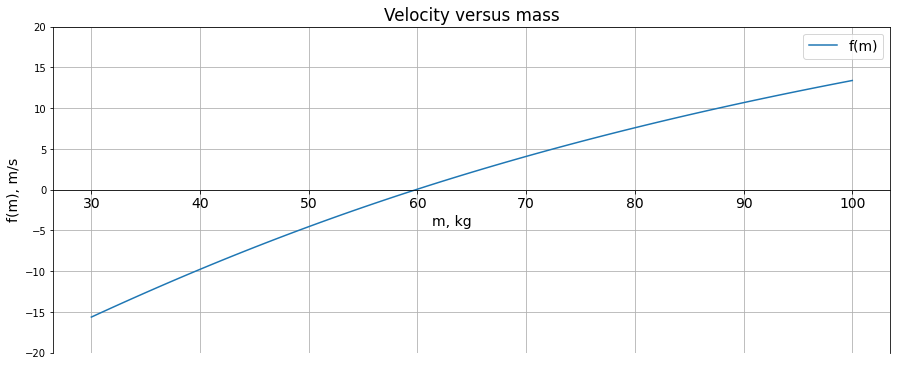

In [6]:
# generate values for graph
m = np.arange(30, 101)
f = function(m)

# set up parameters for our plot
fig, ax = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 14})
labels = ["f(m)"] 
ax.set_ylim(-20, 20)
ax.spines['bottom'].set_position('center')
ax.xaxis.set_ticks_position('bottom')
ax.plot(m, f)
ax.legend(labels)
ax.set(title='Velocity versus mass')
plt.xlabel('m, kg',fontsize=14, horizontalalignment='right')
plt.ylabel('f(m), m/s',fontsize=14)
plt.grid()
plt.show()

From this graph, we can clearly see that function $f(m)$ crosses x-axis at $m\approx60 \ kg$. Our root is somewhere between $50$ and $70 \ kg$. To see how close $m=60 \ kg$ to the real result, I will calculate relative error.

In [7]:
def relative_error(true, measured):
  return abs(true-measured)/true

I will calculate relative error of velocity, as we do not know what is the true value of mass. We try to estimate such $m$ that $v(m)=35 \ m/s$, so true velocity is $35 \ m/s$ and measured is $v(60)$.

In [8]:
print("Relative error:", relative_error(v_0, velocity(60)))

Relative error: 0.0019528684907119294


From this relative error we can say that $m$ is pretty close to value of $60 \ kg$. But in this experiment we try to estimate the most accurate value.

###False-position method
This is a bracketing method, from "Methods" section we know that it requires two innitial guesses. By graphical method we determined that our root is somewhere between $50$ and $70 \ kg$.

In [9]:
m_l = np.float128(50)
m_u = np.float128(70)

If there is no root at defined region, the function may not converge. So we should set reasonable number of iterations of the loop. The level of $\varepsilon_s$ is set to $10^{-12}$.

In [10]:
max_i = 100 # the alghoritm will iterate max_i times maximum in case it does not converge
epsilon = 10e-12 # we will approximate our result to this level

Now, I emplement all formulas as functions. Function `step(m_0, m_1)` calculates $\varepsilon_s$, where $m_0$ is value of previous iteration and $m_1$ is value of current iteration. The function `step()` will be used in all other methods too.

In [11]:
# function to calculate epsilon_s
def step(m_0, m_1):
  return abs((m_1-m_0)/m_1)

Function `derivative(m_0, m_1)` returns slope between two points (it will be used later on in Secant method).

In [12]:
# approximated derivative of function f(m)
def derivative(m_0, m_1):
  return (function(m_0) - function(m_1))/(m_0-m_1)

Function `false_position(m_l, m_u)` takes our initial guesses for mass and acts according to alghoritm described in "Methods". At the end it returns the list of relative errors for each iteration and approximated mass.

In [13]:
def false_position(m_l, m_u):
  err = []
  m_r = m_u
  for i in range(1, max_i):
    # we will need old root to calcukate epsilon_s
    m_r_old = m_r
    
    # the formula for the root
    m_r = m_u - function(m_u)/derivative(m_l, m_u)
    
    # we need values for relative error in each iteration to plot the graph
    err.append(relative_error(velocity(m_r), v_0))
    
    epsilon_s = step(m_r_old, m_r)
    print(f"Iteration #{i}, m = {m_r}, epsilon_s = {epsilon_s}, v = {velocity(m_r)}, relative error = {err[-1]}")
    
    # we approximate our mass to the level of epsilon_s
    if epsilon_s < epsilon: 
      break
      
    # test of changing the borders of the interval
    test = function(m_l)*function(m_r)
    if test > 0: 
      m_l = m_r
    elif test == 0:
      break
    else: 
      m_u = m_r
  
  return m_r, err    

The result of function is stored to `mass_FP, err_1`, where FP states for False-position. I will name all variables for mass results in this style. 

In [14]:
mass_FP, err_1 = false_position(m_l, m_u)

Iteration #1, m = 60.51423018797448, epsilon_s = 0.1567527139081172, v = 35.28846404926169, relative error = 0.008174457490102259
Iteration #2, m = 59.88461306536265, epsilon_s = 0.010513838035901233, v = 35.01874889855094, relative error = 0.0005353960132971488
Iteration #3, m = 59.84385943295144, epsilon_s = 0.0006809994007299647, v = 35.001211586566654, relative error = 3.461556076871096e-05
Iteration #4, m = 59.841226566436916, epsilon_s = 4.399753590609792e-05, v = 35.000078265510936, relative error = 2.2361524549330157e-06
Iteration #5, m = 59.84105649267782, epsilon_s = 2.842091518153992e-06, v = 35.000005055637025, relative error = 1.444467512375195e-07
Iteration #6, m = 59.84104550660972, epsilon_s = 1.835875027099371e-07, v = 35.00000032657329, relative error = 9.330665466033314e-09
Iteration #7, m = 59.841044796955096, epsilon_s = 1.1858994558116542e-08, v = 35.00000002109528, relative error = 6.027224392531324e-10
Iteration #8, m = 59.84104475111434, epsilon_s = 7.660420430

We will have to plot relative error versus number of iteration graphs for each method, so I write a function `plot_graph(err)` that takes a list of relative errors.

In [15]:
def plot_graph(err):
  # generate data for plot
  iteration=np.arange(1,len(err)+1)
  # set parameters for the graph
  fig, ax = plt.subplots(figsize=(15, 6))
  plt.rcParams.update({'font.size': 14})
  labels = ["Relative error"] 
  ax.plot(iteration, err)
  ax.legend(labels)
  ax.set(title='Relative error vs n iterations')
  ax.set_xlim(0, )
  plt.yscale('log')
  plt.xlabel('n',fontsize=14)
  plt.ylabel('Relative error',fontsize=14)
  plt.grid()
  plt.show()

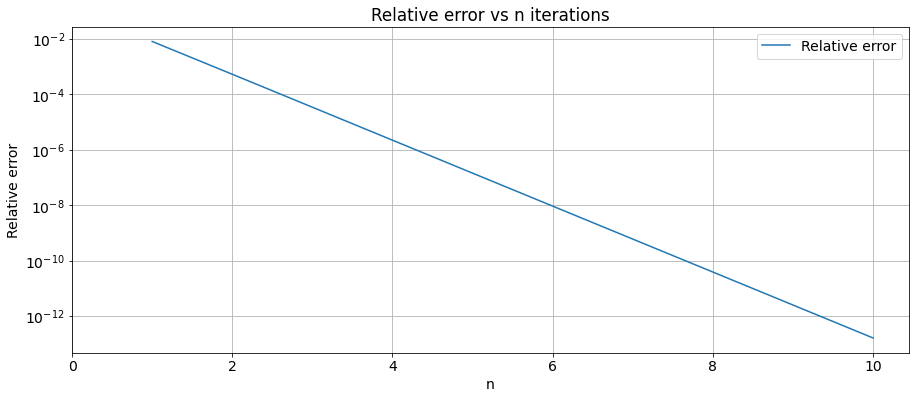

In [16]:
plot_graph(err_1)

From the graph we see that convergence rate for False position method equals to 10.

In [17]:
velocity(mass_FP) #velocity of parachoutist with estimated mass, true value is 35

35.000000000005685907

In [18]:
err_1[-1] #relative error of velocity

1.6245447447586311046e-13

In comparison with graphical method, we obtained much more precise result (almost 10 times more accurate). But it took to many iterations to converge for such small innitial interval.

###Newton-Raphson method
For Newton-Raphson method, we at first should derive analytical formula for deroivative. After some simplifications, I have come up with:

$$f'(m) = C_1 + C_1e^{\frac{C_2}{m}}(\frac{C_2}{m}-1)$$


In [19]:
def derivative_new(m):
  return C_1+C_1*np.exp(C_2/m)*(C_2/m-1)

Newton-Raphson method requires only one initial guess, I have decided to set $m_0$ to $50 \ kg$.

In [20]:
m_0 = np.float128(50)

The function `newton_raphson(m_0)` takes only innitial guess, computes next "root" according to formula explained in "Methods" and stops if reaches defined level of $\varepsilon_s$.

In [21]:
def newton_raphson(m_0):
  err = []
  for i in range(0, max_i):
    # m_1 will temporarly store approximated root to compute epsilon_s
    m_1 = m_0 - function(m_0)/derivative_new(m_0)
    
    # compute epsilon_s
    epsilon_s = step(m_0, m_1)
    
    # update current approximated root
    m_0 = m_1
    
    # we will need values of relative error at each iteration to plot the graph
    err.append(relative_error(velocity(m_0), v_0))
    
    print(f"Iteration #{i+1}, m = {m_1}, epsilon_s  = {epsilon_s}, v = {velocity(m_1)}, relative error = {err[-1]}")
    
    # we approximate the root to defined level of epsilon_s
    if epsilon_s < epsilon: 
      return m_0, err
    

At the end of the execution, it returns approximated mass and relative errors for each iteration.

In [22]:
mass_NR, err_2 = newton_raphson(m_0)

Iteration #1, m = 59.22579374493676, epsilon_s  = 0.1557732393535963, v = 34.73405433599018, relative error = 0.0076566260142645216
Iteration #2, m = 59.83849337530053, epsilon_s  = 0.010239222209706805, v = 34.99890171689062, relative error = 3.1380502115748415e-05
Iteration #3, m = 59.841044703931196, epsilon_s  = 4.2635095080406657e-05, v = 34.999999981052206, relative error = 5.413655166966632e-10
Iteration #4, m = 59.84104474794873, epsilon_s  = 7.355743037957537e-10, v = 35.0, relative error = 1.9825411154020652e-19
Iteration #5, m = 59.84104474794873, epsilon_s  = 2.8988856783558596e-19, v = 35.0, relative error = 9.912705577010326e-20


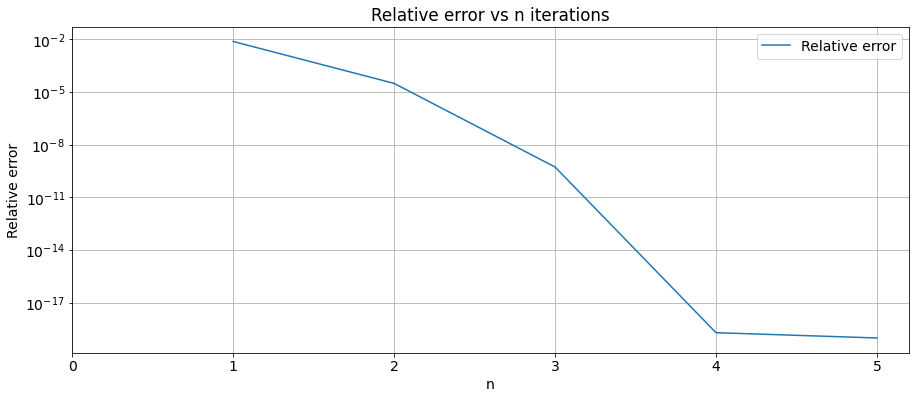

In [23]:
plot_graph(err_2)

As we have set level of $\varepsilon_s$ to $10^{-12}$, the Newton-Raphson method seem to make one unnecessary iteration. After 4 iterations the relative error converged. So the convergence rate = 4.

In [24]:
velocity(mass_NR) #velocity of parachoutist with estimated mass, true value is 35

35.000000000000000003

In [25]:
err_2[-1] #relative error of velocity

9.912705577010326253e-20

In comparison with False-position method, we obtained much more precise result (almost 7 times more accurate). And it took only 4 iterations until convergence of relative error, which is 2.5 times less. But it required the derivation of analytical formula for derivative, which is compuationaly very expensive. 

###Secant method

As Secant method calculates derivatives based on vlaues of previous iterations, we should provide two initial guesses for mass:


In [26]:
mass_1 = np.float128(50) 
mass_2 = np.float128(70)

The function `secant_method(mass)` takes a list with two initial guesses and while execution appends approximated values for mass. The alghoritm uses the last two element of the list `mass` to approximate the root.

In [27]:
def secant_method(mass_1, mass_2):
  err = []
  for i in range(1, max_i):

    temp = mass_2
    # calculate mass[i+1] value
    mass_2 = mass_2 - function(mass_2)/derivative(mass_1, mass_2) 
    # update mass[i] value
    mass_1 = temp
    
    # we will need values of relative error at each iteration to plot the graph
    err.append(relative_error(velocity(mass_2), v_0)) 

    # compute epsilon_s
    epsilon_s=step(mass_1, mass_2) 
    print(f"Iteration #{i}, m = {mass_2}, epsilon_s = {epsilon_s}, v = {velocity(mass_2)}, relative error = {err[-1]}")
    
    # we approximate mass to value of epsilon_s
    if epsilon_s < epsilon: 
      return mass_2, err


At the end, function `secant_method(mass)` returns the same variables as in previous two methods.

In [28]:
mass_SM, err_3 = secant_method(mass_1, mass_2)

Iteration #1, m = 60.51423018797448, epsilon_s = 0.1567527139081172, v = 35.28846404926169, relative error = 0.008174457490102259
Iteration #2, m = 59.79363233296128, epsilon_s = 0.012051414622221887, v = 34.97958430179191, relative error = 0.0005836461071678833
Iteration #3, m = 59.841260927771586, epsilon_s = 0.0007959156286461519, v = 35.00009305665517, relative error = 2.6587545072093888e-06
Iteration #4, m = 59.841044817249376, epsilon_s = 3.611409574633968e-06, v = 35.00000002983116, relative error = 8.523189458446861e-10
Iteration #5, m = 59.84104474794863, epsilon_s = 1.1580804722396314e-09, v = 34.99999999999996, relative error = 1.2459279639744294e-15
Iteration #6, m = 59.84104474794873, epsilon_s = 1.692891258446255e-15, v = 35.0, relative error = 9.912705577010326e-20


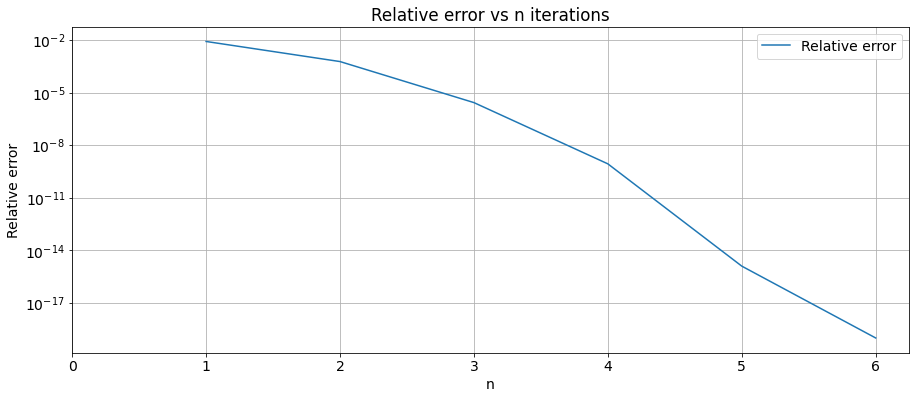

In [29]:
plot_graph(err_3)

In [30]:
velocity(mass_SM)

34.999999999999999997

Secant method still converged faster than False-position method, but its convergence is slower than Newton-Raphson method. The Newton-Raphson real convergence occured at 4 iteration, but we approximate value of $m$ to elevel of $\varepsilon_s<10^{-12}$. After 5 iteration Newton-Raphson with Secant method have almost the same precision.

In [31]:
err_3[-1] - err_2[-1]

1.763241526233431262e-38

In [33]:
def show_table():
  methods = ["Graphical", "False-position", "Newton-Raphson", "Secant"]
  iter = ["–", len(err_1), len(err_2), len(err_3)]
  conv = ["–", len(err_1), len(err_2)-1, len(err_3)]
  velocities = [velocity(m) for m in masses]
  rel_error = [relative_error(v_0, v) for v in velocities]
  return pd.DataFrame({'Method': methods, 'Iterations' : iter, 'm, kg': masses, 'v(m), m/s' : velocities, 'Relative error': rel_error, 'Convergence rate':conv})

---
##Conclusion
In this experiment we have tried to approximate $m$ (mass), so that $v(m) = 35 \ m/s$. We used graphical method to improve understanding of the function's behaviour and have initial quess about the range of possible values for $m$. Then we use these initial guesses to calculate approximate value of $m$ with False-position, Newton-Raphson and Secant Method.

We can judge the accuracy of approximated mass based on value of $v(m)$, as we don't know what is a true value of $m$. In the table below you can see summative results shown by different methods.

In [34]:
show_table()

,Method,Iterations,"m, kg","v(m), m/s",Relative error,Convergence rate
0,Graphical,–,60.000000,35.06835,1.952868e-03,–
1,False-position,10,59.841045,35.00000,1.624545e-13,10
2,Newton-Raphson,5,59.841045,35.00000,9.912706e-20,4
3,Secant,6,59.841045,35.00000,9.912706e-20,6


From the table, we can conclude that Newton-Raphson and Secant method have shown relatively the same relative error of $\varepsilon\approx9.9\cdot10^{-20}	$ for $v(m)$. The results in the table are rounded. Newton-Raphson after 5 iterations has shown slightly smaller error than Secant Method.

In [35]:
err_3[-1] - err_2[-1]

1.763241526233431262e-38

> Note: The precion of approximated mass is also deoends on the datatype which stores our result. The precision of all three methods could be the same if I have used a standart float (I used np.float128 which is more precise).


False-position method coped with the approximation much worse than Newton-Raphson and Secant methods. It approximated the mass with relative error of $\varepsilon\approx1.6\cdot10^{-13}$. In this particular problem, False-position also converged much slower (it took up to 10 iterations to achief precision lower than other two methods). The realization of the alghoritms is also more complicated as it requires to conduct a test to change borders of the interval. In the beginning of the experiment, I have supposed that bracketing methods are more relible than open methods (which is usually the case), but in our problem two open methods converged successfully. So, for our equation, I do not think that False-position method is a good choice.

As Newton-Raphson and Secant methods have shown relatively the same precision of $9.9\cdot10^{-20}$, so I would assess them in terms of simplicity of realization, time complexity and convergence rate. Newton-Raphson method is much more difficult to code, as it requires derivation of analytical formula for derivative of function at first. Once I have derived the formula, I have noticed that it contains exponent in power (usually it takes much time to calculate). But this method have shown the smallest convergence rate for this particular problem. Secant method has shown average convergence rate. But its alghoritm was the easiest one and computational cost can be lower than of Newton-Raphson (it depend on function). The Secant method is more general and can be used with any function, while Newton-Raphson method requires new derivative function for each problem.

The maximum precision for three methods:
1. False-position methdod's precision $\approx1.6\cdot10^{-13}$
2. Newton-Raphson's precision $\approx9.9\cdot10^{-20}$
3. Secant method's precision $\approx9.9\cdot10^{-20}$

Overall I think that the fastest method for our equation was Newton-Raphson method, as its convergence rate was the smallest one. In the future to make more convinient conclusion it would be better if we also compare time complexities of those methods. But if I needed to choose the most convinient method, I would probably used a Secant method. Derivation of analytical formula for derivative and its compuation takes much time. If it was a different problem that converged much slower, the difference in time execution between Secant method and Newton-Raphson method would be more obvious. 

The conclusion of this experiment assumes that we judge perfomance of the three methods with particular equation. It does not states that the outcome of the experiment is always the case. The experiment also does not take into account the effect of choosing different initial guess, which may affect convergence rate. The fastest solution in terms of convergence (not time!, judging time complexity beyond the scope of this experiment) for our equation is Newton-Raphson method. 